In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import kde
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import normal_ad
from sklearn.model_selection import cross_val_score
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
from statsmodels.tools.tools import add_constant
%matplotlib inline 

In [2]:
data = pd.read_csv('Crab Molt Data.csv')

In [3]:
data.shape

(472, 3)

In [4]:
data

,Post-molt,Pre-molt,Location
0,127.7,113.6,Field
1,133.2,118.1,Field
2,135.3,119.9,Field
3,143.3,126.2,Field
4,139.3,126.7,Field
...,...,...,...
467,150.3,135.9,Lab
468,151.2,135.6,Lab
469,143.5,129.6,Lab
470,148.3,134.1,Lab


### Descriptive Statistics of Pre-molt and Post-molt Variables

In [5]:
pre_molt = data['Pre-molt']
post_molt = data['Post-molt']

In [6]:
print("Average size difference before and after Molting: {:.2f}".format(post_molt.mean() - pre_molt.mean()))

Average size difference before and after Molting: 14.69


### Pre-molt

In [7]:
print("Minimum size of Crab before Molting:", min(pre_molt))
print("Maximum size of Crab before Molting:", max(pre_molt))
print("Mean size of Crab before Molting: {:.2f}".format(pre_molt.mean()))
print("Median size of Crab before Molting: {:.2f}".format(pre_molt.median()))
print("Standard Deviation of Crab size before Molting: {:.2f}".format(pre_molt.std()))
print("Skewness of distribution of Crab size before Molting: {:.4f}".format(skew(pre_molt, axis=0, bias=True)))
print("Kurtosis of distribution of Crab size before Molting: {:.4f}".format(kurtosis(pre_molt, axis=0, bias=True)))

Minimum size of Crab before Molting: 31.1
Maximum size of Crab before Molting: 155.1
Mean size of Crab before Molting: 129.21
Median size of Crab before Molting: 132.80
Standard Deviation of Crab size before Molting: 15.86
Skewness of distribution of Crab size before Molting: -2.0035
Kurtosis of distribution of Crab size before Molting: 6.7663


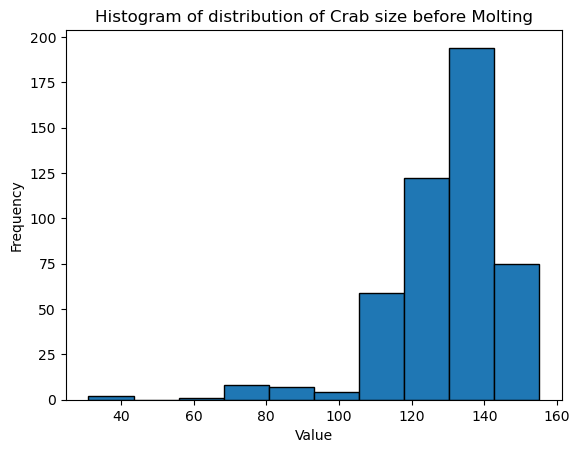

In [8]:
# Create histogram
plt.hist(pre_molt, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of distribution of Crab size before Molting')
plt.show()

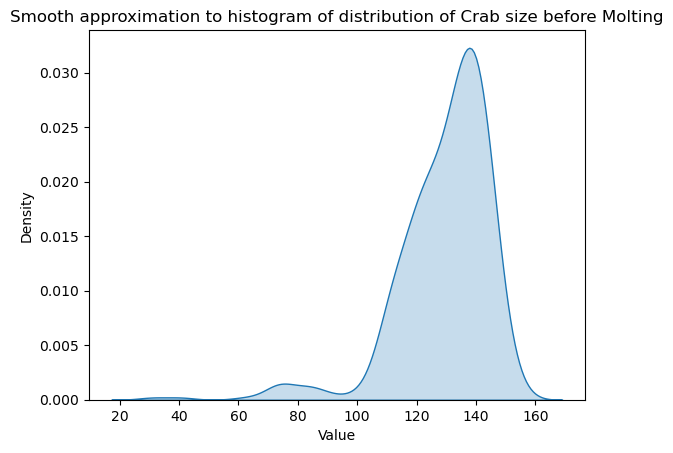

In [9]:
# Create KDE plot
sns.kdeplot(pre_molt, fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Smooth approximation to histogram of distribution of Crab size before Molting')
plt.show()

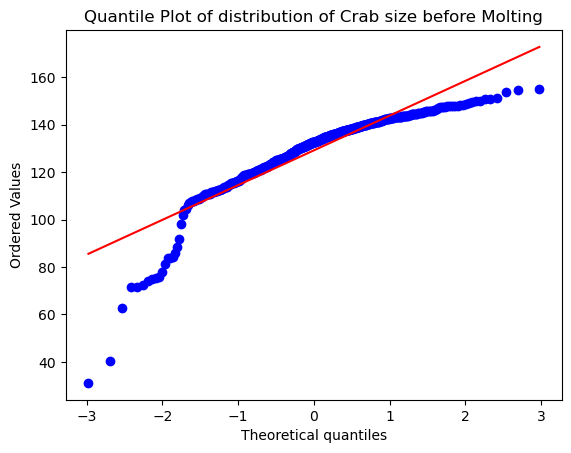

In [10]:
# Create QQ plot
plt.figure()
stats.probplot(pre_molt, dist="norm", plot=plt)
plt.title('Quantile Plot of distribution of Crab size before Molting')
plt.show()

In [11]:
# Various tests for Normality
pvalue_pre_molt_ad = normal_ad(pre_molt)[1]
pvalue_pre_molt_sw = stats.shapiro(pre_molt).pvalue
pvalue_pre_molt_ks = stats.kstest(pre_molt, "norm").pvalue
pvalue_pre_molt_cv = stats.cramervonmises(pre_molt, "norm").pvalue
print("P-value for Pre Molt data using Anderson-Darling Test: ", pvalue_pre_molt_ad)
print("P-value for Pre Molt data using Shapiro-Wilk Test: ", pvalue_pre_molt_sw)
print("P-value for Pre Molt data using Kolmogorov-Smirnov Test: ", pvalue_pre_molt_ks)
print("P-value for Pre Molt data using Cramér–von Mises Test: ", pvalue_pre_molt_ks)

P-value for Pre Molt data using Anderson-Darling Test:  5.84129257221062e-31
P-value for Pre Molt data using Shapiro-Wilk Test:  8.999501305758897e-21
P-value for Pre Molt data using Kolmogorov-Smirnov Test:  0.0
P-value for Pre Molt data using Cramér–von Mises Test:  0.0


### Post-molt

In [12]:
print("Minimum size of Crab after Molting:", min(post_molt))
print("Maximum size of Crab after Molting:", max(post_molt))
print("Mean size of Crab after Molting: {:.2f}".format(post_molt.mean()))
print("Median size of Crab after Molting: {:.2f}".format(post_molt.median()))
print("Standard Deviation of Crab size after Molting: {:.2f}".format(post_molt.std()))
print("Skewness of distribution of Crab size after Molting: {:.4f}".format(skew(post_molt, axis=0, bias=True)))
print("Kurtosis of distribution of Crab size after Molting: {:.4f}".format(kurtosis(post_molt, axis=0, bias=True)))

Minimum size of Crab after Molting: 38.8
Maximum size of Crab after Molting: 166.8
Mean size of Crab after Molting: 143.90
Median size of Crab after Molting: 147.40
Standard Deviation of Crab size after Molting: 14.64
Skewness of distribution of Crab size after Molting: -2.3469
Kurtosis of distribution of Crab size after Molting: 10.1160


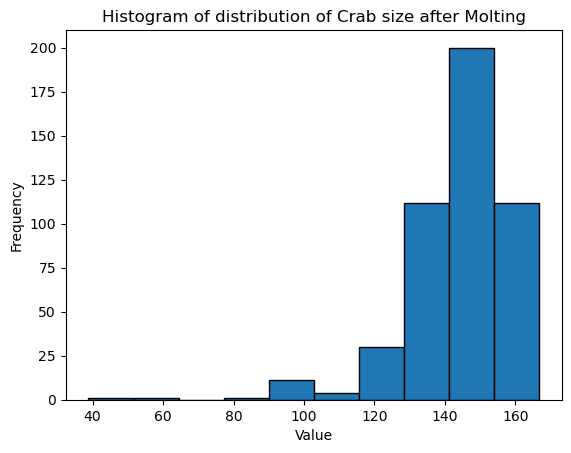

In [13]:
# Create histogram
plt.hist(post_molt, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of distribution of Crab size after Molting')
plt.show()

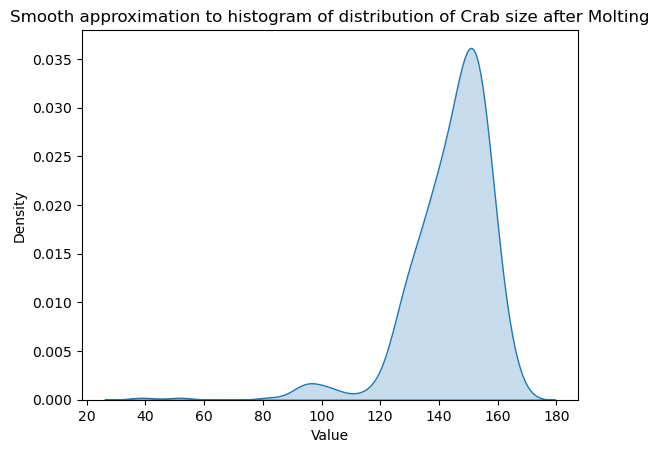

In [14]:
# Create KDE plot
sns.kdeplot(post_molt, fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Smooth approximation to histogram of distribution of Crab size after Molting')
plt.show()

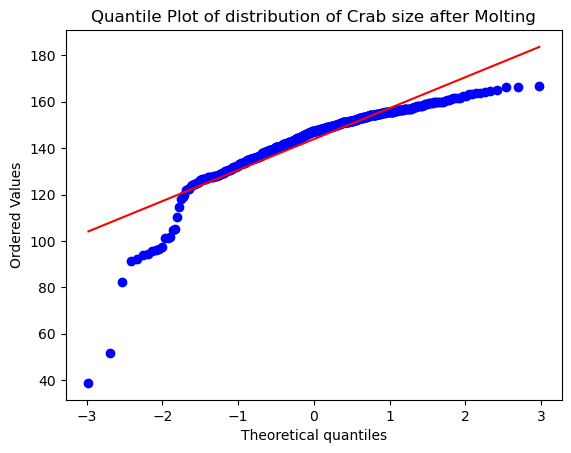

In [15]:
# Create QQ plot
plt.figure()
stats.probplot(post_molt, dist="norm", plot=plt)
plt.title('Quantile Plot of distribution of Crab size after Molting')
plt.show()

In [16]:
# Various tests for Normality
pvalue_post_molt_ad = normal_ad(post_molt)[1]
pvalue_post_molt_sw = stats.shapiro(post_molt).pvalue
pvalue_post_molt_ks = stats.kstest(post_molt, "norm").pvalue
pvalue_post_molt_cv = stats.cramervonmises(post_molt, "norm").pvalue
print("P-value for Pre Molt data using Anderson-Darling Test: ", pvalue_post_molt_ad)
print("P-value for Pre Molt data using Shapiro-Wilk Test: ", pvalue_post_molt_sw)
print("P-value for Pre Molt data using Kolmogorov-Smirnov Test: ", pvalue_post_molt_ks)
print("P-value for Pre Molt data using Cramér–von Mises Test: ", pvalue_post_molt_ks)

P-value for Pre Molt data using Anderson-Darling Test:  0.0
P-value for Pre Molt data using Shapiro-Wilk Test:  4.862027690351223e-22
P-value for Pre Molt data using Kolmogorov-Smirnov Test:  0.0
P-value for Pre Molt data using Cramér–von Mises Test:  0.0


### A plot showing a comparison of smooth histograms of the distribution post-molt and pre-molt variables

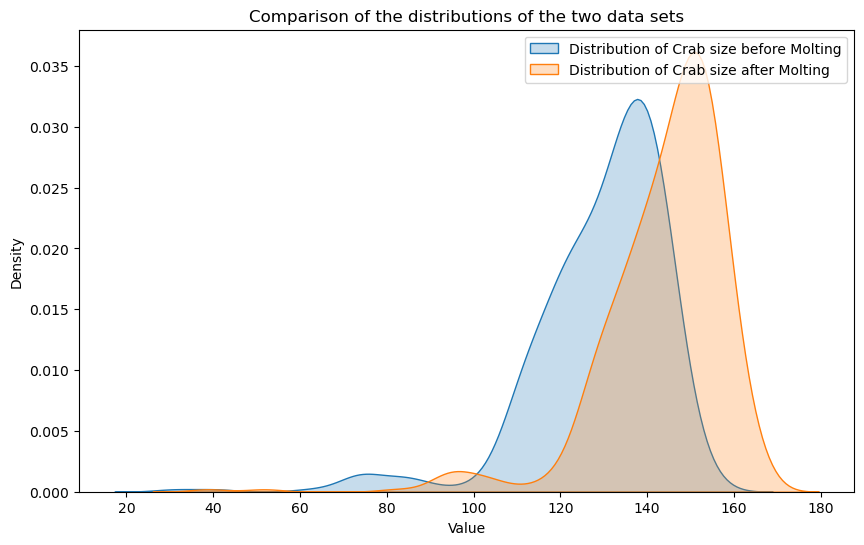

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(pre_molt, fill=True, label='Distribution of Crab size before Molting')
sns.kdeplot(post_molt, fill=True, label='Distribution of Crab size after Molting')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Comparison of the distributions of the two data sets')
plt.legend()
plt.show()

### A scatterplot of pre-molt sizes versus post-molt sizes

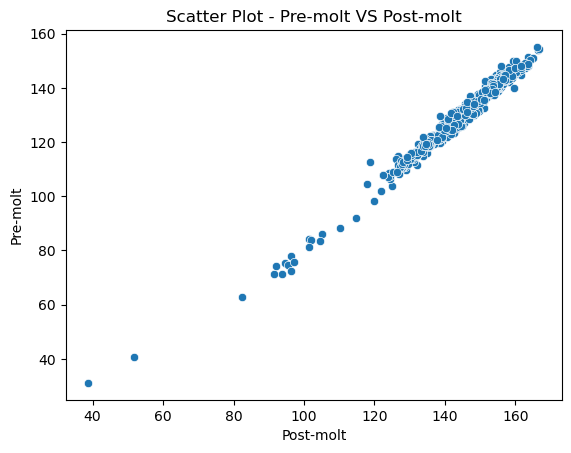

In [18]:
# Create scatter plot 
sns.scatterplot(x=post_molt, y=pre_molt)
plt.xlabel('Post-molt')
plt.ylabel('Pre-molt')
plt.title('Scatter Plot - Pre-molt VS Post-molt')
plt.show()

### A linear least squares model for predicting pre-molt sizes from post-molt sizes

In [19]:
# Reshape the data
X = np.array(post_molt).reshape(-1, 1)
Y = np.array(pre_molt)

# Fit linear regression model
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [20]:
# Predict pre-molt sizes
predicted_pre_molt = model.predict(X)

In [21]:
slope = model.coef_[0]
intercept = model.intercept_
equation = "y = {:.3f}x + {:.3f}".format(slope, intercept)
print("Slope: {:.4f}".format(slope))
print("Intercept: {:.4f}".format(intercept))
print('Equation: ', equation)

Slope: 1.0732
Intercept: -25.2137
Equation:  y = 1.073x + -25.214


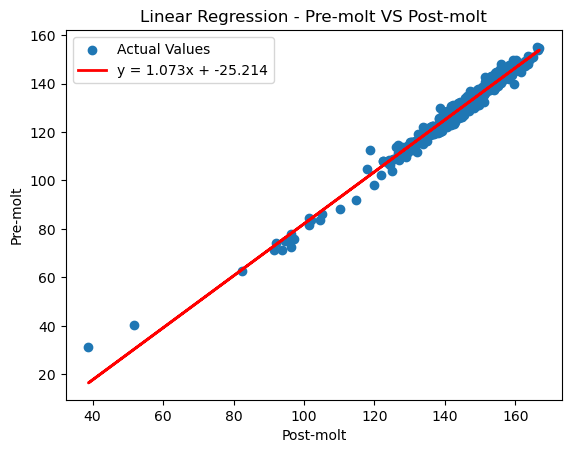

In [22]:
# Plot outputs
plt.scatter(X, Y)
plt.plot(X, predicted_pre_molt, color="red", linewidth=2)
plt.xlabel('Post-molt')
plt.ylabel('Pre-molt')
plt.title('Linear Regression - Pre-molt VS Post-molt')
plt.legend(['Actual Values', equation], loc='upper left')
plt.show()

#### Pearson's R-squared value

In [23]:
r_squared = model.score(X, Y)
r_squared

0.9808325947886156

#### Plot of the residuals

In [24]:
residuals = Y - predicted_pre_molt

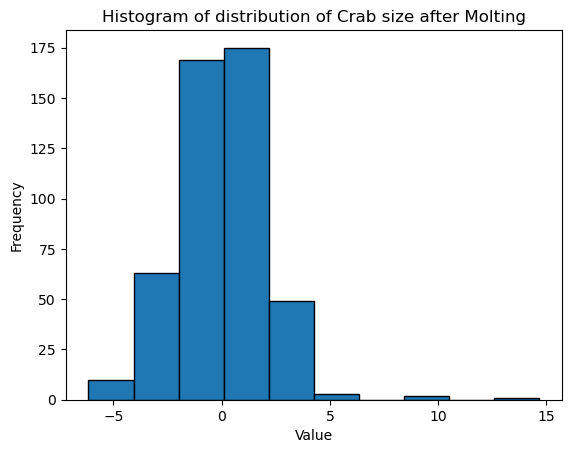

In [25]:
# Create histogram
plt.hist(residuals, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of distribution of Crab size after Molting')
plt.show()

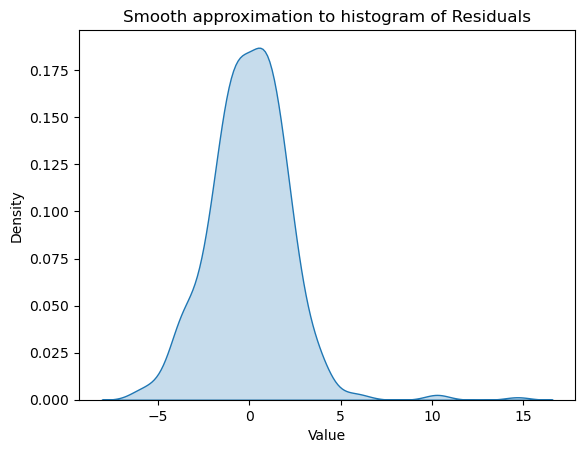

In [26]:
# Create KDE plot
sns.kdeplot(residuals, fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Smooth approximation to histogram of Residuals')
plt.show()

#### Normality of the residuals

In [27]:
print("Skewness of Residuals: {:.4f}".format(skew(residuals, axis=0, bias=True)))
print("Kurtosis of Residuals: {:.4f}".format(kurtosis(residuals, axis=0, bias=True)))

Skewness of Residuals: 0.8455
Kurtosis of Residuals: 5.3787


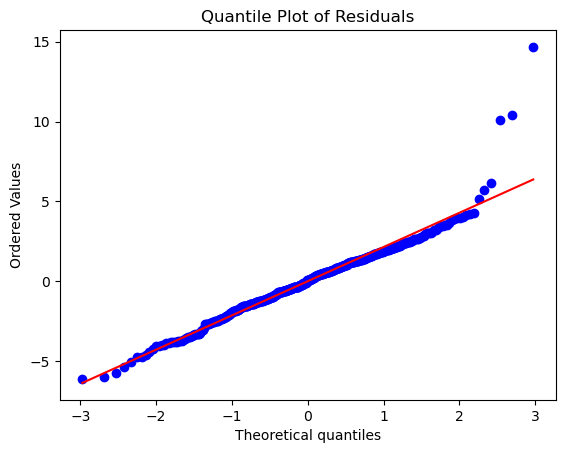

In [28]:
# Create QQ plot
plt.figure()
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Quantile Plot of Residuals')
plt.show()

In [29]:
# Various tests for Normality
pvalue_residuals_ad = normal_ad(residuals)[1]
pvalue_residuals_sw = stats.shapiro(residuals).pvalue
pvalue_residuals_ks = stats.kstest(residuals, "norm").pvalue
pvalue_residuals_cv = stats.cramervonmises(residuals, "norm").pvalue
print("P-value for Residuals data using Anderson-Darling Test: ", pvalue_residuals_ad)
print("P-value for Residuals data using Shapiro-Wilk Test: ", pvalue_residuals_sw)
print("P-value for Residuals data using Kolmogorov-Smirnov Test: ", pvalue_residuals_ks)
print("P-value for Residuals data using Cramér–von Mises Test: ", pvalue_residuals_ks)

P-value for Pre Molt data using Anderson-Darling Test:  0.00011506617586914685
P-value for Pre Molt data using Shapiro-Wilk Test:  6.358130168193643e-12
P-value for Pre Molt data using Kolmogorov-Smirnov Test:  2.5554400301036748e-12
P-value for Pre Molt data using Cramér–von Mises Test:  2.5554400301036748e-12


### Heteroskedasticity

#### Visual estimation from the plot of residuals

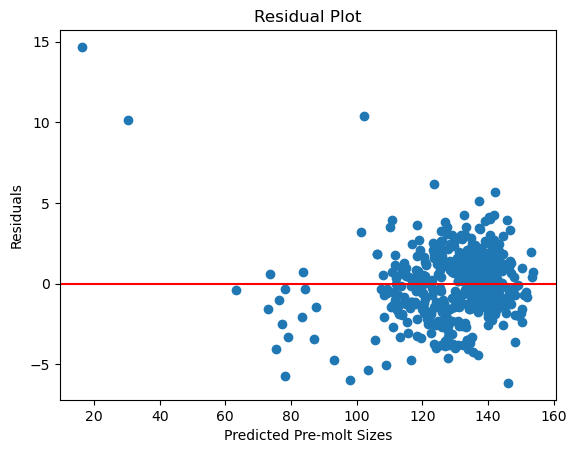

In [30]:
plt.scatter(predicted_pre_molt, residuals)
plt.xlabel('Predicted Pre-molt Sizes')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

#### Breusch–Pagan Test

In [31]:
# Add constant term to X if needed
X_ = add_constant(X)  # Make sure X has at least two columns

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
for label, result in zip(labels, bp_test):
    print(f"{label}: {result}")

LM Statistic: 89.38639408257598
LM-Test p-value: 3.2476245276302648e-21
F-Statistic: 109.80164993891431
F-Test p-value: 3.1294545123620833e-23


#### White test

In [32]:
# Perform White test
white_test = het_white(residuals, X_)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
for label, result in zip(labels, white_test):
    print(f"{label}: {result}")

LM Statistic: 238.22876801746258
LM-Test p-value: 1.8590039377747353e-52
F-Statistic: 238.97143214041003
F-Test p-value: 2.767618354610456e-72


### Analysis of potentially different linear models for lab versus field crabs

#### Field Crabs

In [33]:
data_field = data[data["Location"] == "Field"]

In [34]:
data_field = data_field.drop("Location", axis = 1)

In [35]:
pre_molt_field = data_field['Pre-molt']
post_molt_field = data_field['Post-molt']

In [36]:
# Reshape the data
X_field = np.array(post_molt_field).reshape(-1, 1)
Y_field = np.array(pre_molt_field)

# Fit linear regression model
model_field = LinearRegression()
model_field.fit(X_field, Y_field)

LinearRegression()

In [37]:
# Predict pre-molt sizes
predicted_pre_molt_field = model_field.predict(X_field)

In [38]:
slope_field = model_field.coef_[0]
intercept_field = model_field.intercept_
equation_field = "y = {:.3f}x + {:.3f}".format(slope_field, intercept_field)
print("Slope: {:.4f}".format(slope_field))
print("Intercept: {:.4f}".format(intercept_field))
print('Equation: ', equation_field)

Slope: 1.0421
Intercept: -20.4016
Equation:  y = 1.042x + -20.402


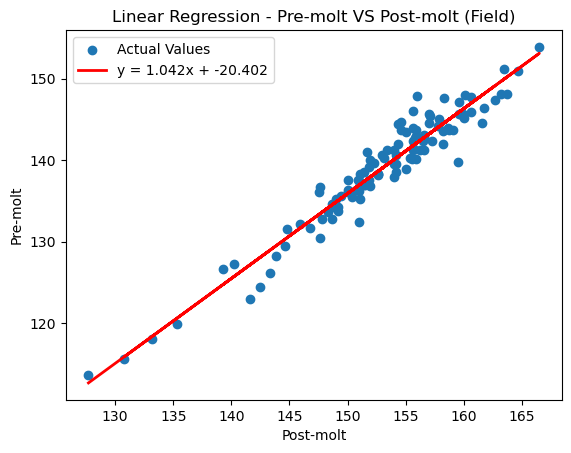

In [39]:
# Plot outputs
plt.scatter(X_field, Y_field)
plt.plot(X_field, predicted_pre_molt_field, color="red", linewidth=2)
plt.xlabel('Post-molt')
plt.ylabel('Pre-molt')
plt.title('Linear Regression - Pre-molt VS Post-molt (Field)')
plt.legend(['Actual Values', equation_field], loc='upper left')
plt.show()

In [40]:
r_squared = model_field.score(X_field, Y_field)
r_squared

0.9327747000533485

#### Lab Crabs

In [41]:
data_lab = data[data["Location"] == "Lab"]

In [42]:
data_lab = data_lab.drop("Location", axis = 1)

In [43]:
pre_molt_lab = data_lab['Pre-molt']
post_molt_lab = data_lab['Post-molt']

In [44]:
# Reshape the data
X_lab = np.array(post_molt_lab).reshape(-1, 1)
Y_lab = np.array(pre_molt_lab)

In [45]:
# Fit linear regression model
model_lab = LinearRegression()
model_lab.fit(X_lab, Y_lab)

LinearRegression()

In [46]:
# Predict pre-molt sizes
predicted_pre_molt_lab = model_lab.predict(X_lab)

In [47]:
slope_lab = model_lab.coef_[0]
intercept_lab = model_lab.intercept_
equation_lab = "y = {:.3f}x + {:.3f}".format(slope_lab, intercept_lab)
print("Slope: {:.4f}".format(slope_lab))
print("Intercept: {:.4f}".format(intercept_lab))
print('Equation: ', equation_lab)

Slope: 1.0739
Intercept: -25.3439
Equation:  y = 1.074x + -25.344


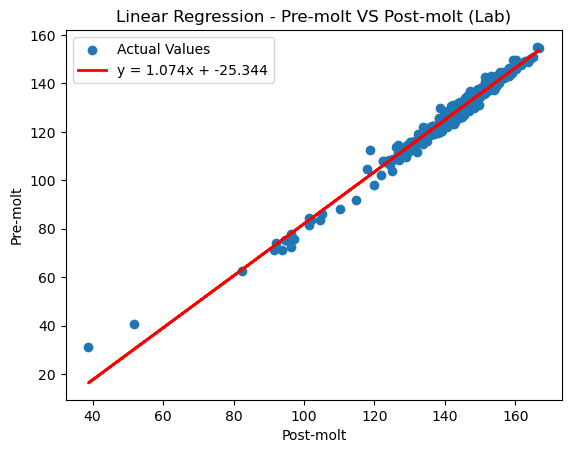

In [48]:
# Plot outputs
plt.scatter(X_lab, Y_lab)
plt.plot(X_lab, predicted_pre_molt_lab, color="red", linewidth=2)
plt.xlabel('Post-molt')
plt.ylabel('Pre-molt')
plt.title('Linear Regression - Pre-molt VS Post-molt (Lab)')
plt.legend(['Actual Values', equation_lab], loc='upper left')
plt.show()

In [49]:
r_squared = model_lab.score(X_lab, Y_lab)
r_squared

0.9809989339639513

### Utilizing cross-validation to estimate prediction accuracy of linear model

In [50]:
# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(model, X, Y, cv=k, scoring='r2')

for i, score in enumerate(cv_scores, start=1):
    print(f"R-squared Score (Fold {i}) = {score}")
print("Mean R-squared Score = ", cv_scores.mean())

R-squared Score (Fold 1) = 0.9347890038239732
R-squared Score (Fold 2) = 0.9881082547655841
R-squared Score (Fold 3) = 0.9605659682730662
R-squared Score (Fold 4) = 0.9505222363907887
R-squared Score (Fold 5) = 0.9493029121354887
Mean R-squared Score =  0.95665767507778
